In [1]:
from data_loader import from_directory, into_directory
from evaluators import Evaluator_sum, Evaluator_naive, Evaluator_detailed
from algo import main_algo

from strategies import get_dcs_random, get_dcs_utilized, get_dcs_emptiest
from strategies import get_tenants_random, get_tenants_heaviest, get_tenants_lightest

from checking_results import utilization_dcs, placement_tenants
from checking_results import dump_experiment

from experiments import empty_experiment_run, experiment_run

import os

## Yulia

In [2]:
# %time experiment_run("9_algo", "dcs_800", "800_1000", 200, "detailed", "tenant_random", "dc_random")
%time empty_experiment_run("9_algo", "detailed", "tenant_random", "dc_emptiest")

KeyboardInterrupt: 

In [3]:
%time experiment_run("9_algo", "dcs_800", "800_1000", 800, 200, "detailed", "tenant_heaviest", "dc_emptiest")

dcs proposing taking away: 1
ACCEPTED
recursive search for 1 tenants
dcs proposing taking away: 1
ACCEPTED
recursive search for 2 tenants
dcs proposing taking away: 1
ACCEPTED
recursive search for 4 tenants
smth was deleted, new len is 0
CPU times: user 23.2 s, sys: 765 ms, total: 24 s
Wall time: 45.7 s


In [4]:
%time experiment_run("9_algo", "dcs_800", "800_1000", 800, 200, "detailed", "tenant_heaviest", "dc_random")

dcs proposing taking away: 1
ACCEPTED
recursive search for 2 tenants
CPU times: user 24.4 s, sys: 516 ms, total: 25 s
Wall time: 35.8 s


## With return

In [2]:
from data_loader import with_return
dom_dcs, dom_tens = with_return()
e = Evaluator_sum()

In [3]:
for ten in dom_tens:
    ten.evaluation = e.get_tenant_evaluation(ten)
[x.evaluation for x in dom_tens]

[{'sts': [{'assignedTo': 'controller1', 'size': 1}],
  'vms': [{'RAM': 1, 'VCPUs': 1, 'assignedTo': 'computer1'}]},
 {'sts': [{'assignedTo': None, 'size': 500}],
  'vms': [{'RAM': 15, 'VCPUs': 10, 'assignedTo': None}]}]

In [4]:
for dc in dom_dcs:
    dc.evaluation = e.get_dc_evaluation(dc)
[dc.evaluation for dc in dom_dcs]
# [e.get_empty_dc_evaluation(dc) for dc in dom_dcs]

[{'RAM': 19, 'VCPUs': 10, 'storage': 999},
 {'RAM': 20, 'VCPUs': 10, 'storage': 1000}]

In [5]:
[x.evaluation for x in get_dcs_utilized(dom_tens[1], dom_dcs)]

[{'RAM': 19, 'VCPUs': 10, 'storage': 999},
 {'RAM': 20, 'VCPUs': 10, 'storage': 1000}]

In [6]:
dom_benchmarks, dom_res = main_algo(1, 1, dom_dcs, dom_tens, Evaluator_sum(), get_tenants_heaviest, get_dcs_utilized)
dom_benchmarks

dcs proposing taking away: 1
recursive search for 1 tenants


[({'placed': 2, 'total': 2, 'vals': [('fst', 1), ('snd', 1)]},
  {'avg': 0.5238095238095238,
   'max': 0.9090909090909091,
   'vals': [0.9090909090909091, 0.1]},
  [0.006498813629150391, None],
  0.31920552253723145)]

In [7]:
[x.mark for x in dom_tens]

['snd', 'fst']

In [32]:
[dc.evaluation for dc in dom_dcs]

[{'RAM': 0, 'VCPUs': 0, 'storage': 0},
 {'RAM': 10, 'VCPUs': 10, 'storage': 0},
 {'RAM': 0, 'VCPUs': 0, 'storage': 0}]

In [3]:
dcs, tenants = from_directory("examples/dcs_800/")
e = Evaluator_sum()

In [4]:
len([x for x in tenants[:800] if x.mark is not None])

711

In [5]:
%time benchmarks, res = main_algo(3, 1, dcs, tenants[800:], e, get_tenants_random, get_dcs_random)

Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-2:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-6:
Traceback (most recent call last):
  File "/home/vasilesk/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/vasilesk/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vasilesk/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/vasilesk/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vasilesk/anaconda3/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap

  File "/home/vasilesk/anaconda3/lib/python3.5/subprocess.py", line 1399, in wait
    (pid, sts) = self._try_wait(0)
  File "/home/vasilesk/anaconda3/lib/python3.5/subprocess.py", line 1349, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/vasilesk/anaconda3/lib/python3.5/subprocess.py", line 1349, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt


KeyboardInterrupt: 

In [13]:
benchmarks[-1]

({'placed': 208,
  'total': 1464,
  'vals': [('1', 15),
   ('6', 19),
   ('8', 20),
   ('2', 24),
   ('4', 37),
   ('7', 32),
   ('5', 20),
   ('3', 41)]},
 {'avg': 0.3918721238533508,
  'max': 0.5581731303478165,
  'vals': [0.438676967648479,
   0.2583972826770663,
   0.5581731303478165,
   0.32949964429689355,
   0.5186312889662172,
   0.20194596832626022,
   0.3708965023278023,
   0.5113167259786476]},
 [41.65874910354614,
  27.18291711807251,
  61.99514579772949,
  14.552889585494995,
  69.46960210800171,
  19.166126251220703,
  47.01550483703613,
  27.61017942428589],
 76.63044595718384)

## Andrei

In [9]:
%time empty_experiment_run("detailed", "tenant_random", "dc_emptiest")

CPU times: user 22 s, sys: 508 ms, total: 22.5 s
Wall time: 9min 2s


In [8]:
%time empty_experiment_run("detailed", "tenant_lightest", "dc_utilized")

CPU times: user 20.9 s, sys: 768 ms, total: 21.7 s
Wall time: 54min 41s


In [7]:
%time empty_experiment_run("detailed", "tenant_heaviest", "dc_utilized")

CPU times: user 18.3 s, sys: 498 ms, total: 18.8 s
Wall time: 29min 42s


In [6]:
%time empty_experiment_run("detailed", "tenant_random", "dc_utilized")

CPU times: user 18.7 s, sys: 564 ms, total: 19.3 s
Wall time: 29min 5s


In [4]:
%time empty_experiment_run("detailed", "tenant_lightest", "dc_random")

CPU times: user 22.2 s, sys: 501 ms, total: 22.7 s
Wall time: 12min 10s


In [3]:
%time empty_experiment_run("detailed", "tenant_heaviest", "dc_random")

CPU times: user 23.8 s, sys: 513 ms, total: 24.3 s
Wall time: 10min 10s


In [5]:
%time empty_experiment_run("detailed", "tenant_random", "dc_random")

CPU times: user 23.4 s, sys: 541 ms, total: 23.9 s
Wall time: 8min 12s


In [8]:
%time empty_experiment_run("naive", "tenant_heaviest", "dc_random")

CPU times: user 18.5 s, sys: 616 ms, total: 19.2 s
Wall time: 12min


In [10]:
%time empty_experiment_run("naive", "tenant_lightest", "dc_random")

CPU times: user 19.6 s, sys: 521 ms, total: 20.1 s
Wall time: 10min 35s


In [4]:
%time empty_experiment_run("naive", "tenant_random", "dc_random")

CPU times: user 9.7 s, sys: 369 ms, total: 10.1 s
Wall time: 7min 50s


In [ ]:
e = Evaluator_naive()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [ ]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [ ]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_random, get_dcs_random)

In [7]:
benchmarks[-1]

({'placed': 692,
  'total': 800,
  'vals': [('7', 56),
   ('6', 60),
   ('4', 67),
   ('3', 135),
   ('5', 91),
   ('1', 131),
   ('2', 49),
   ('8', 103)]},
 {'avg': 0.2864261116021089,
  'max': 0.42382486942993663,
  'vals': [0.41224046354418153,
   0.1617813561454271,
   0.42382486942993663,
   0.2099834005216979,
   0.3634913730607511,
   0.16416520028982506,
   0.19505789662170228,
   0.39629893238434166]},
 [18.026583433151245,
  0.16402935981750488,
  60.557613372802734,
  2.3819379806518555,
  87.01584315299988,
  14.575486898422241,
  58.04981970787048,
  81.42462825775146],
 90.08166551589966)

In [4]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [5]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [6]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_random, get_dcs_emptiest)

CPU times: user 13.9 s, sys: 390 ms, total: 14.3 s
Wall time: 18min 4s


In [12]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_random/dc_emptiest/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_random/dc_emptiest/data/")

In [21]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [22]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [23]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_random, get_dcs_utilized)

CPU times: user 11.3 s, sys: 794 ms, total: 12.1 s
Wall time: 39min 39s


In [24]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_random/dc_utilized/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_random/dc_utilized/data/")

In [26]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [27]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [28]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_random, get_dcs_random)

CPU times: user 14.5 s, sys: 525 ms, total: 15.1 s
Wall time: 9min 12s


In [29]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_random/dc_random/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_random/dc_random/data/")

In [32]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [33]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [34]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_heaviest, get_dcs_random)

CPU times: user 13 s, sys: 545 ms, total: 13.6 s
Wall time: 8min 33s


In [35]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_heaviest/dc_random/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_heaviest/dc_random/data/")

In [37]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [38]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [39]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_heaviest, get_dcs_emptiest)

CPU times: user 12.8 s, sys: 568 ms, total: 13.3 s
Wall time: 7min 50s


In [29]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_heaviest/dc_emptiest/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_heaviest/dc_emptiest/data/")

In [41]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [42]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [43]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_heaviest, get_dcs_utilized)

CPU times: user 10.9 s, sys: 666 ms, total: 11.5 s
Wall time: 29min 56s


In [44]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_heaviest/dc_utilized/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_heaviest/dc_utilized/data/")

In [45]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [46]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [47]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_lightiest, get_dcs_emptiest)

CPU times: user 12 s, sys: 517 ms, total: 12.5 s
Wall time: 7min 46s


In [48]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_lightest/dc_emptiest/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_lightest/dc_emptiest/data/")

In [50]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [51]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [52]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_lightiest, get_dcs_utilized)

CPU times: user 10.9 s, sys: 991 ms, total: 11.9 s
Wall time: 54min 12s


In [53]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_lightest/dc_utilized/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_lightest/dc_utilized/data/")

In [54]:
e = Evaluator_sum()
dcs, tenants = from_directory("examples/dcs_empty_sorted/")

In [55]:
tenants1, tenants2 = tenants[:800], tenants[800:]

In [56]:
%time benchmarks, everything_placed = main_algo(3, 1, dcs, tenants1, e, get_tenants_lightiest, get_dcs_random)

CPU times: user 14.4 s, sys: 658 ms, total: 15.1 s
Wall time: 9min 48s


In [57]:
dump_experiment(benchmarks, "experiments/andrei/empty800/summed/tenant_lightest/dc_random/benchmark.json")
into_directory(dcs, tenants, "experiments/andrei/empty800/summed/tenant_lightest/dc_random/data/")

In [58]:
benchmarks[-1]

({'placed': 698,
  'total': 800,
  'vals': [('3', 118),
   ('4', 46),
   ('2', 43),
   ('5', 102),
   ('1', 130),
   ('7', 94),
   ('6', 65),
   ('8', 100)]},
 {'avg': 0.2903117666778411,
  'max': 0.4268469338483824,
  'vals': [0.4268469338483824,
   0.16366838596049818,
   0.3485942882542505,
   0.16599478302110504,
   0.406843555168914,
   0.17751785529448297,
   0.2869762444789304,
   0.39188612099644127]},
 [31.30626368522644,
  24.41778874397278,
  2.832810163497925,
  16.359923362731934,
  94.56232452392578,
  18.09459662437439,
  44.38703727722168,
  50.72416877746582],
 99.3683111667633)

In [25]:
benchmarks[-1]

({'placed': 325,
  'total': 800,
  'vals': [('1', 58), ('8', 89), ('2', 55), ('5', 123)]},
 {'avg': 0.15000152378630421,
  'max': 0.5461794983326084,
  'vals': [0.1971269917914051,
   0.2201534784249591,
   0.0,
   0.0,
   0.5461794983326084,
   0.0,
   0.0,
   0.38348754448398575]},
 [0.1469721794128418,
  454.650381565094,
  None,
  None,
  660.2073061466217,
  None,
  None,
  331.40085196495056],
 664.159606218338)

In [17]:
_, tenants_other = from_directory("experiments/andrei/empty800/summed/tenant_random/dc_emptiest/data/")

In [20]:
len([x for x in tenants_other if x.mark is not None])

580

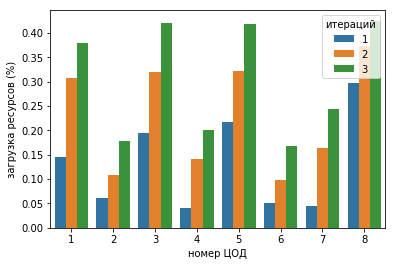

In [30]:
import seaborn as sns
import pandas as pd
# sort_order = [2, 3, 5, 6, 1, 0, 4, 7]
df = []
for i, benchmark in enumerate(benchmarks):
    vals = benchmark[1]["vals"]
#     vals = [vals[i] for i in sort_order]
    for j,val in enumerate(vals):
        df.append({"итераций": i+1, "номер ЦОД":j+1, "загрузка ресурсов (%)": val})


df = pd.DataFrame().from_records(df)
sns.barplot(x="номер ЦОД", y="загрузка ресурсов (%)", hue="итераций", data=df)

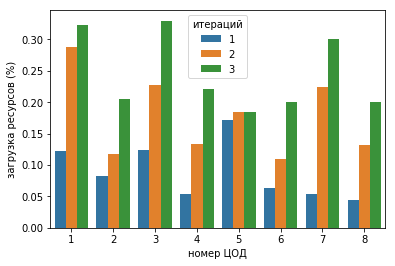

In [9]:
import seaborn as sns
import pandas as pd
# sort_order = [2, 3, 5, 6, 1, 0, 4, 7]
df = []
for i, benchmark in enumerate(benchmarks):
    vals = benchmark[1]["vals"]
#     vals = [vals[i] for i in sort_order]
    for j,val in enumerate(vals):
        df.append({"итераций": i+1, "номер ЦОД":j+1, "загрузка ресурсов (%)": val})


df = pd.DataFrame().from_records(df)
sns.barplot(x="номер ЦОД", y="загрузка ресурсов (%)", hue="итераций", data=df)

In [15]:
benchmarks

[({'placed': 207,
   'total': 800,
   'vals': [('5', 49),
    ('4', 16),
    ('2', 21),
    ('3', 42),
    ('1', 30),
    ('7', 15),
    ('6', 24),
    ('8', 10)]},
  {'avg': 0.08818151342455734,
   'max': 0.17094388864723792,
   'vals': [0.1230082085948817,
    0.08290350987545603,
    0.12323591510167796,
    0.053474033673227415,
    0.17094388864723792,
    0.06355449746403063,
    0.053121642592813656,
    0.044270462633451954]},
  [77.98375940322876,
   56.84868884086609,
   76.95585250854492,
   64.51919603347778,
   11.308684349060059,
   415.9469084739685,
   34.51923632621765,
   21.186854362487793],
  420.84837913513184),
 ({'placed': 406,
   'total': 800,
   'vals': [('3', 72),
    ('4', 36),
    ('8', 33),
    ('5', 54),
    ('1', 80),
    ('7', 65),
    ('6', 36),
    ('2', 30)]},
  {'avg': 0.176942065644714,
   'max': 0.2870593915982617,
   'vals': [0.2870593915982617,
    0.11787646244810668,
    0.22691410156684075,
    0.13398150343846335,
    0.1850079744816587,
    